In [1]:
import pandas as pd
pd.set_option('display.precision', 3)

In [2]:
path  ="/content/drive/MyDrive/Colab Notebooks/pred9.jpg"

In [3]:
import tensorflow as tf
import numpy as np
from imageio import imread
from skimage.transform import resize
import cv2
from cv2 import IMREAD_GRAYSCALE,COLOR_BGR2GRAY
from google.colab.patches import cv2_imshow
import os
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.optimizers import Adam,SGD,RMSprop,Adadelta

In [ ]:
path= "/content/drive/MyDrive/Colab Notebooks/yenidata"


X_data = []
y_data = []
for subdir, dirs, files in os.walk(path):
   print(subdir)
   for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = resize(pic, (96, 96,1))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))



X = np.array(X_data) / 255
y = np.array(y_data)

print(X.shape)
print(y.shape)


/content/drive/MyDrive/Colab Notebooks/yenidata
/content/drive/MyDrive/Colab Notebooks/yenidata/0
/content/drive/MyDrive/Colab Notebooks/yenidata/0/.ipynb_checkpoints
/content/drive/MyDrive/Colab Notebooks/yenidata/.ipynb_checkpoints
/content/drive/MyDrive/Colab Notebooks/yenidata/1
(3000, 96, 96, 1)
(3000,)


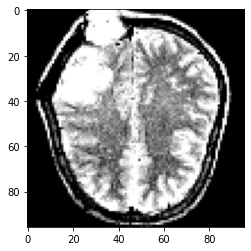

In [4]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/y1.jpg")
resized_img = cv2.resize(img,(96,96))
plt.imshow(resized_img, cmap ="gray")

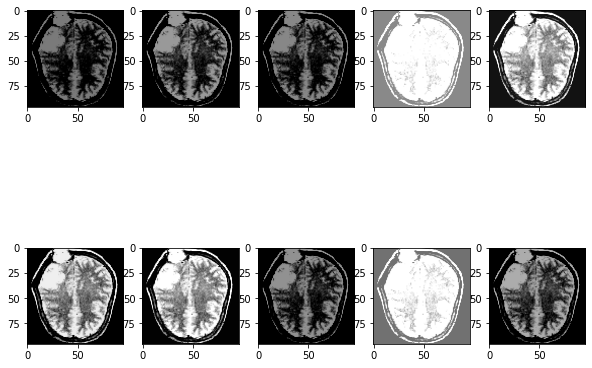

In [7]:
data_augmentation_brightness = tf.keras.Sequential(
  [
   tf.keras.layers.RandomBrightness(factor=0.6)
  ]
)

fig = plt.figure(figsize=(10,8))
for i in range(10):
   plt.subplot(2,5,i+1)
   plt.imshow(data_augmentation_brightness(resized_img).numpy().reshape(96,96,3).astype("uint8"))


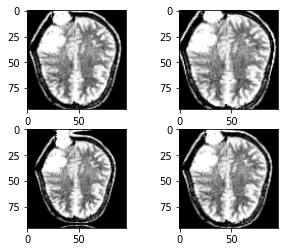

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

fig = plt.figure(figsize=(5,4))
for i in range(4):
   plt.subplot(2,2,i+1)
   plt.imshow(data_augmentation(resized_img).numpy().reshape(96,96,3).astype("uint8"))


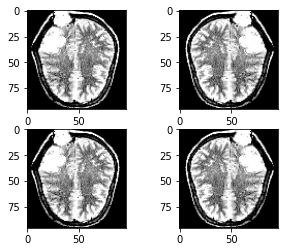

In [ ]:
data_augmentation_horizontal = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

fig = plt.figure(figsize=(5,4))
for i in range(4):
   plt.subplot(2,2,i+1)
   plt.imshow(data_augmentation_horizontal(resized_img).numpy().astype("uint8"))


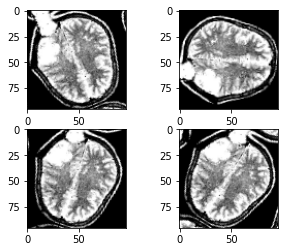

In [ ]:
data_augmentation_rotation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
  ]
)

fig = plt.figure(figsize=(5,4))
for i in range(4):
   plt.subplot(2,2,i+1)
   plt.imshow(data_augmentation_rotation(resized_img).numpy().astype("uint8"))


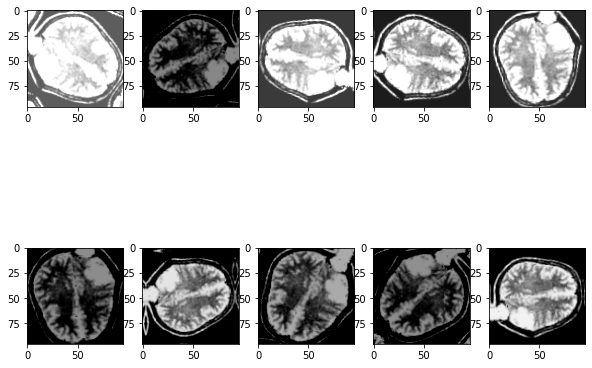

In [9]:
data_augmentation_karma = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
   tf.keras.layers.RandomBrightness(factor=0.5),
  ]
)

fig = plt.figure(figsize=(10,8))
for i in range(10):
   plt.subplot(2,5,i+1)
   plt.imshow(data_augmentation_karma(resized_img).numpy().reshape(96,96,3).astype("uint8"))